# Testing EnKF on non-linear system
Projectile is thrown from mass 1 towards mass 2.

## Dependencies

In [1]:
import numpy as np

from matplotlib import pyplot as plt

## Parameters

In [35]:
def F(r):
    G =  6.67e-11 # in units of m^3/s^2/m2 - ~6.67e-11 N m^2/kg^2
    

    
    # r1 - distance from m1 to m
    # r2 - distance from m2 to m
    # r1hat and r2hat are the unit vectors in the direction of r1 and r2
    # r - position of the projectile

    x, y = r
    # m1 is a the origin
    r1vec = r
    r1 = np.sqrt(x**2 + y**2)
    r1hat = r1vec/r1
    
    # m2 is at (0, y2)
    r2vec = np.array([r[0], r[1]-y2])
    r2 = np.sqrt(r2vec[0]**2 + r2vec[1]**2)
    r2hat = r2vec/r2
    
    F1vec = -G*m*m1/r1/r1*r1hat
    F2vec = -G*m*m2/r2/r2*r2hat

    return F1vec+F2vec

y2 = 3.8e8  # m : distance from m2 to m1
m = 1e3 # kg : mass of the projectile
m1 = 6e24   # in units of m1 ~ 6e24 kg
m2 = 7e22   # ~ 7e22 kg

R1 = 3.6e6 # m: radius of m1
R2 = 1.7e6 # m: radius of m2

# initial conditions
rx_0 = R1 # m: (r1x_0, r1y_0) is the initial position, at the surface of m2
ry_0 = 0
v0 = 1e5 # m/s initial speed of the projectile

# Time array
tfin = 1000
dt = 0.1
tar = np.arange(0, tfin, dt)

In [36]:
xar = np.zeros_like(tar)
vxar = np.zeros_like(tar)
yar = np.zeros_like(tar)
vyar = np.zeros_like(tar)

xar[0] = R1
vxar[0] = 0
yar[0] = 0
vyar[0] = v0

for tix in range(len(tar)-1):
    Ft = F((xar[tix], yar[tix]))
    vxar[tix+1] = vxar[tix] + Ft[0]/m*dt
    vyar[tix+1] = vyar[tix] + Ft[1]/m*dt
    xar[tix+1] = xar[tix] + vxar[tix]*dt
    yar[tix+1] = yar[tix] + vyar[tix]*dt

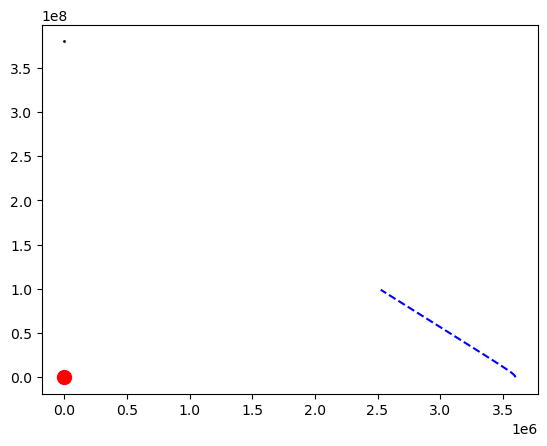

In [37]:
fig, ax = plt.subplots(1,1)
ax.plot(0,0, 'ro', ms=10)
ax.plot(0,y2,'ko', ms=1)
ax.plot(xar, yar, 'b--')